<a href="https://colab.research.google.com/github/Kee-Keerthi002/Stock-Market-Prediction/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Normalize the data
df = pd.read_csv('Stock_prices.csv')

scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create sequences of data for training
sequence_length = 10  # You can adjust this value
X = []
y = []

for i in range(len(df) - sequence_length):
    X.append(df['Close'].values[i:i+sequence_length])
    y.append(df['Close'].values[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1005/1005 [==============================] - 10s 8ms/step - loss: 0.0061
Epoch 2/10
1005/1005 [==============================] - 8s 8ms/step - loss: 0.0059
Epoch 3/10
1005/1005 [==============================] - 7s 7ms/step - loss: 0.0059
Epoch 4/10
1005/1005 [==============================] - 8s 8ms/step - loss: 0.0057
Epoch 5/10
1005/1005 [==============================] - 7s 7ms/step - loss: 0.0054
Epoch 6/10
1005/1005 [==============================] - 8s 8ms/step - loss: 0.0053
Epoch 7/10
1005/1005 [==============================] - 7s 7ms/step - loss: 0.0052
Epoch 8/10
1005/1005 [==============================] - 8s 8ms/step - loss: 0.0051
Epoch 9/10
1005/1005 [==============================] - 7s 7ms/step - loss: 0.0051
Epoch 10/10
1005/1005 [==============================] - 8s 8ms/step - loss: 0.0050


In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate the RMSE (Root Mean Squared Error) to evaluate the model
train_score = np.sqrt(mean_squared_error(y_train, train_predict))
test_score = np.sqrt(mean_squared_error(y_test, test_predict))
print(f"Train RMSE: {train_score}")
print(f"Test RMSE: {test_score}")

252/252 [==============================] - 1s 3ms/step
Train RMSE: 90.71252860188946
Test RMSE: 77.86288316013976


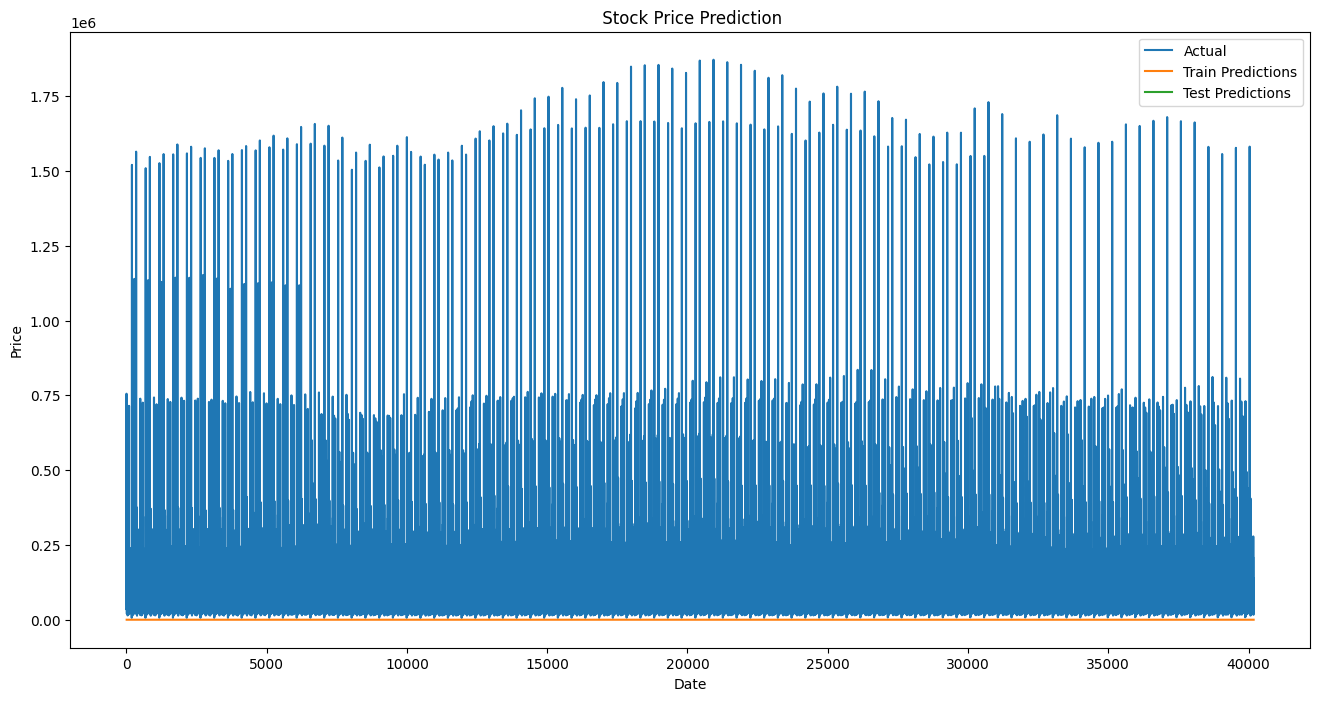

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Shift predictions for plotting
train_predict_plot = np.empty_like(df['Close'])
train_predict_plot[:sequence_length] = np.nan
train_predict_plot[sequence_length:] = train_predict[0]

test_predict_plot = np.empty_like(df['Close'])
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)] = test_predict[0]

# Load the stock data
df = pd.read_csv('Stock_prices.csv')

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object to the Close column of the df DataFrame
scaler.fit(df[['Close']].values)

# Inverse transform the Close column of the df DataFrame using the fitted MinMaxScaler object
inverse_transformed_close = scaler.inverse_transform(df[['Close']].values)


# Plot the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.title(f' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(df[['Close']].values), label='Actual')
plt.plot(train_predict_plot, label='Train Predictions')
plt.plot(test_predict_plot, label='Test Predictions')
plt.legend()
plt.show()

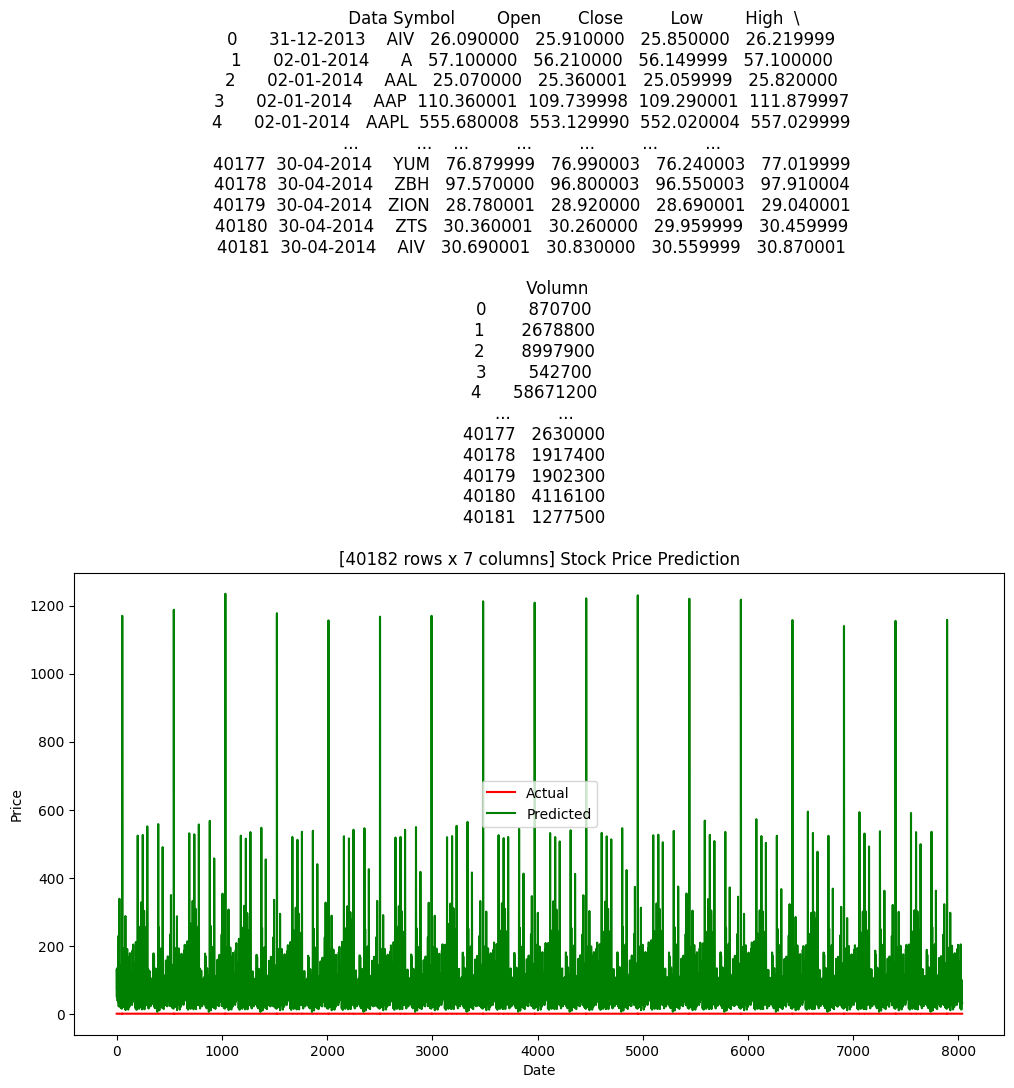

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the stock data
data = pd.read_csv('Stock_prices.csv')

# Preprocess the data
closing_prices = data['Close'].to_numpy()
closing_prices = closing_prices.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
closing_prices = scaler.fit_transform(closing_prices)

# Split the data into train and test sets
train_size = int(len(closing_prices) * 0.8)
test_size = len(closing_prices) - train_size

train_data = closing_prices[:train_size]
test_data = closing_prices[train_size:]

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(train_data, train_data)

# Make predictions
predictions = model.predict(test_data)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.title(f'{data} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(test_data, label='Actual', color='r')
plt.plot(predictions, label='Predicted', color='g')
plt.legend()
plt.show()

In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'CSCO']
print(df.tail())

             Data Symbol       Open      Close        Low       High    Volumn
37841  24-04-2014   CSCO  23.639999  23.330000  23.240000  23.639999  33976700
38331  25-04-2014   CSCO  23.270000  23.000000  22.879999  23.320000  25087300
38821  28-04-2014   CSCO  23.150000  23.020000  22.790001  23.240000  36817100
39311  29-04-2014   CSCO  23.200001  23.160000  23.059999  23.209999  14582400
39801  30-04-2014   CSCO  23.080000  23.110001  22.920000  23.139999  23979300


In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'AAL']
print(df.tail())

             Data Symbol       Open      Close        Low       High    Volumn
37733  24-04-2014    AAL  37.840000  37.259998  35.799999  38.240002  21038700
38223  25-04-2014    AAL  37.000000  36.000000  35.910000  37.110001   9574100
38713  28-04-2014    AAL  36.410000  35.160000  34.340000  36.720001  13149300
39203  29-04-2014    AAL  35.200001  35.509998  34.970001  35.650002   8994200
39693  30-04-2014    AAL  35.680000  35.070000  34.889999  35.880001   6944600


In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'BIIB']
print(df.tail())

             Data Symbol        Open       Close         Low        High  \
37794  24-04-2014   BIIB  307.000000  294.839996  286.480011  308.720001   
38284  25-04-2014   BIIB  293.040009  285.809998  285.579987  296.739990   
38774  28-04-2014   BIIB  289.160004  283.119995  275.390015  292.420013   
39264  29-04-2014   BIIB  285.350006  290.839996  282.000000  294.359985   
39754  30-04-2014   BIIB  285.000000  287.119995  281.320007  291.559998   

        Volumn  
37794  2385300  
38284  1727700  
38774  1802300  
39264  1634500  
39754  1452100  


In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'DOV']
print(df.tail())

             Data Symbol       Open      Close        Low       High   Volumn
37866  24-04-2014    DOV  86.790001  86.190002  85.480003  86.790001  1060500
38356  25-04-2014    DOV  85.720001  84.900002  84.720001  85.989998  1196100
38846  28-04-2014    DOV  85.620003  85.480003  84.220001  85.870003   919500
39336  29-04-2014    DOV  85.690002  85.660004  85.059998  86.089996   513600
39826  30-04-2014    DOV  85.650002  86.400002  85.230003  86.400002   822900


In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'ENDP']
print(df.tail())

             Data Symbol       Open      Close        Low       High   Volumn
37883  24-04-2014   ENDP  61.000000  61.860001  60.189999  62.310001  2644600
38373  25-04-2014   ENDP  62.160000  60.639999  60.400002  62.720001  3370800
38863  28-04-2014   ENDP  61.259998  60.560001  59.689999  61.900002  3076400
39353  29-04-2014   ENDP  60.820000  63.250000  60.570000  63.599998  3607500
39843  30-04-2014   ENDP  63.270000  62.950001  62.110001  65.000000  5206000


In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'FLS']
print(df.tail())

             Data Symbol       Open      Close        Low       High   Volumn
37914  24-04-2014    FLS  77.489998  73.959999  73.010002  77.489998  4158500
38404  25-04-2014    FLS  73.360001  72.870003  72.769997  74.889999  1642300
38894  28-04-2014    FLS  73.110001  72.190002  71.180000  73.680000  1463700
39384  29-04-2014    FLS  72.510002  72.029999  71.470001  72.849998  1182100
39874  30-04-2014    FLS  72.129997  73.050003  71.760002  73.250000  1042100


In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'GILD']
print(df.tail())

             Data Symbol       Open      Close        Low       High    Volumn
37925  24-04-2014   GILD  74.930000  74.080002  71.629997  75.000000  22098100
38415  25-04-2014   GILD  74.019997  73.900002  73.430000  74.879997  22726800
38905  28-04-2014   GILD  74.849998  74.080002  72.769997  76.800003  22497800
39395  29-04-2014   GILD  74.669998  76.239998  74.000000  76.379997  15865700
39885  30-04-2014   GILD  76.150002  78.489998  75.489998  78.669998  20165300


In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'HCP']
print(df.tail())

             Data Symbol       Open      Close        Low       High   Volumn
37945  24-04-2014    HCP  40.840003  40.900003  40.740005  41.210001  2592500
38435  25-04-2014    HCP  40.950002  40.760002  40.669998  41.230002  2423000
38925  28-04-2014    HCP  40.970002  41.610002  40.950002  41.610002  3499900
39415  29-04-2014    HCP  41.770000  41.810005  41.450004  41.900004  4758200
39905  30-04-2014    HCP  41.689999  41.860004  41.500003  41.900004  2419000


In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'IP']
print(df.tail())

             Data Symbol       Open      Close        Low       High   Volumn
37968  24-04-2014     IP  46.100000  46.000002  45.530001  46.100000  2300900
38458  25-04-2014     IP  45.850001  45.630003  45.540000  45.980004  2090400
38948  28-04-2014     IP  45.830003  46.390008  45.510006  46.580009  5760300
39438  29-04-2014     IP  46.310000  45.900000  45.740000  46.400003  4254600
39928  30-04-2014     IP  46.920003  46.650006  46.240006  47.570000  5561800


In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'JCI']
print(df.tail())

             Data Symbol       Open      Close        Low       High   Volumn
37976  24-04-2014    JCI  42.599998  42.209999  42.119999  42.599998  2561600
38466  25-04-2014    JCI  41.520000  41.290001  40.889999  42.080002  8657400
38956  28-04-2014    JCI  41.380001  40.840000  40.160000  41.520000  5140400
39446  29-04-2014    JCI  40.950001  40.990002  40.689999  41.189999  2774700
39936  30-04-2014    JCI  41.020000  40.900002  40.720001  41.310001  3523800


In [ ]:
df=pd.read_csv('Stock_prices.csv')
df.tail()
df=df.loc[df['Symbol'] == 'KMI']
print(df.tail())

             Data Symbol       Open      Close        Low       High   Volumn
37987  24-04-2014    KMI  33.720001  33.680000  33.599998  33.889999  5201900
38477  25-04-2014    KMI  33.689999  33.000000  33.000000  33.689999  7112700
38967  28-04-2014    KMI  32.720001  32.380001  32.259998  32.939999  6946100
39457  29-04-2014    KMI  32.630001  33.020000  32.500000  33.200001  5545900
39947  30-04-2014    KMI  32.930000  32.660000  32.590000  32.950001  4696900


In [ ]:
import math

forecast_col = 'Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())

402
         Data Symbol        Open       Close         Low        High  \
0  31-12-2013    AIV   26.090000   25.910000   25.850000   26.219999   
1  02-01-2014      A   57.100000   56.210000   56.149999   57.100000   
2  02-01-2014    AAL   25.070000   25.360001   25.059999   25.820000   
3  02-01-2014    AAP  110.360001  109.739998  109.290001  111.879997   
4  02-01-2014   AAPL  555.680008  553.129990  552.020004  557.029999   

     Volumn       label  
0    870700  152.089998  
1   2678800   77.750000  
2   8997900   15.590000  
3    542700  114.879997  
4  58671200   88.440002  


In [ ]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

-0.012634121195470582


<ipython-input-1-77cc3ad71539>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


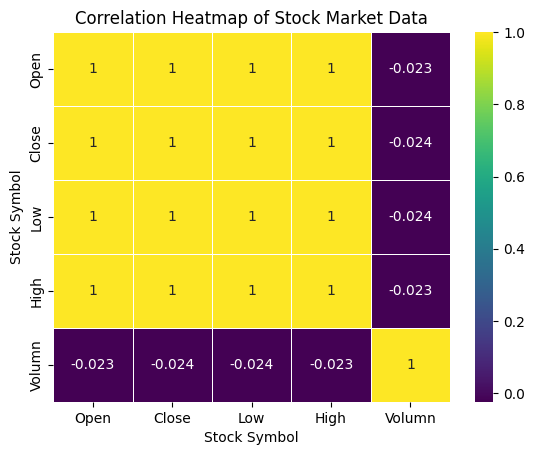

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the stock market dataset
df = pd.read_csv('Stock_prices.csv')

# Create a correlation matrix of the stock market data
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='viridis',
    linewidths=0.5,
)

# Set the title and labels
plt.title('Correlation Heatmap of Stock Market Data')
plt.xlabel('Stock Symbol')
plt.ylabel('Stock Symbol')

# Show the plot
plt.show()


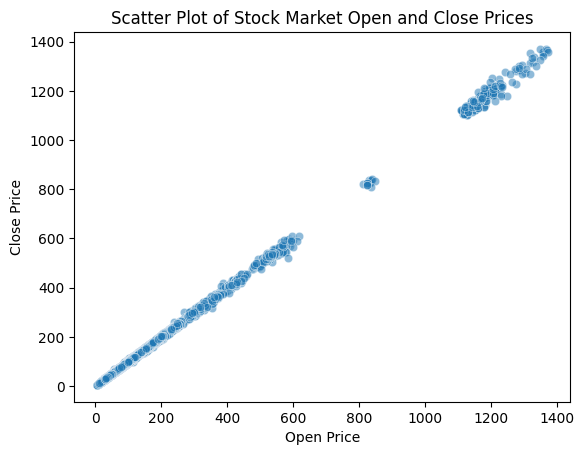

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the stock market dataset
df = pd.read_csv('Stock_prices.csv')

#sns.relplot(x = 'Open', y = 'Close', data=df) another way to plot

# Select the columns to be used in the scatter plot
x = df['Open']
y = df['Close']

# Plot the scatter plot
sns.scatterplot(
    x=x,
    y=y,
    alpha=0.5,
)

# Set the title and labels
plt.title('Scatter Plot of Stock Market Open and Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')

# Show the plot
plt.show()